In [5]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(4,3), dpi=100)
plt.xlabel('w')
plt.ylabel('J')
X = np.linspace(-5, 5, 128)
Y = X ** 2
plt.plot(X, Y)
plt.scatter(X[-10], Y[-10], color='red')

In [10]:
def model(X, W, b):
    '''
    Args:
        x：模型输入向量
        w：模型连接权重向量
        b：模型的偏置值
    Return：
        返回模型输出结果
    '''
    X = np.array(X)
    
    return np.sum(X * W) + b

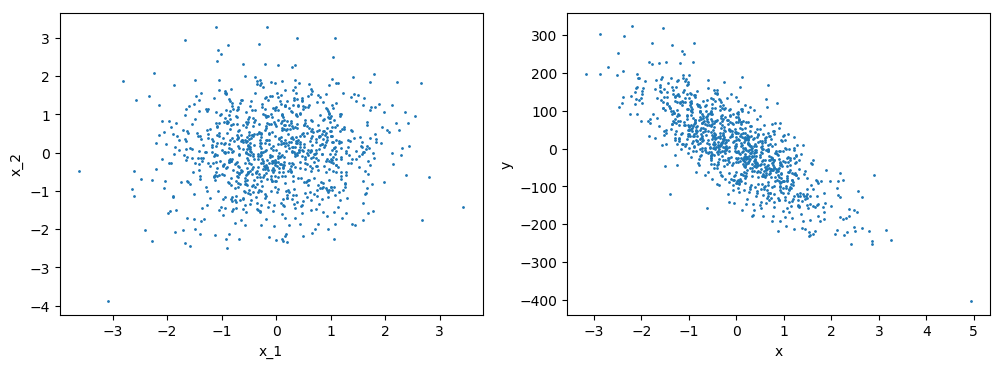

In [7]:
import itertools
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

num_train = 1000

num_test = 100

#制作数据集
data = make_regression(n_samples=num_train, n_features=2)

#可视化数据集
plt.figure(figsize=[12, 4], dpi=100)
plt.subplot(1, 2, 1)
plt.scatter(data[0][:,0], data[0][:, 1], 1) #scatter（X，Y，S）S代表面积
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.subplot(1, 2, 2)
x = PCA(n_components=1).fit_transform(data[0])
plt.scatter(x, data[1], 1)
plt.xlabel('x')
plt.ylabel('y')

#将数据集分割成为训练集与测试集，并将数据集转成可迭代对象
train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size = num_test)]

Text(0,0.5,'losses')

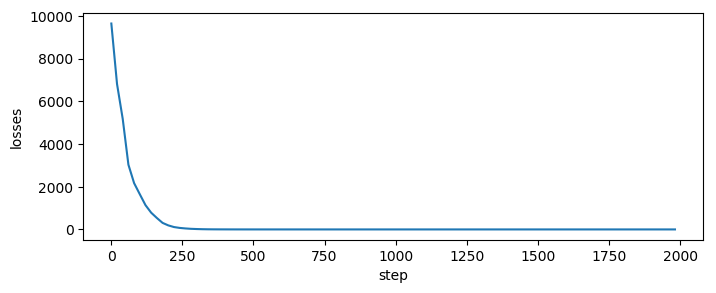

In [11]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np

#随机梯度下降算法
train_steps = 2000     # 训练次数
lr = 0.01              # 学习率
summary_step = 20      # 摘要频率
summary = []           # 摘要

W = np.random.randn(2) # 初始化连接权重
b = 0                  # 初始化偏置值
for i in range(train_steps):
    #摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X, W, b)
            tmp.append(np.array([label, out]))
            
        tmp = np.array(tmp)
        # 计算均方误差代价
        loss = mse(tmp[:,0], tmp[:, 1])
        summary.append(np.array([i + 1, loss]))
    
    # 获得一个样本， 并输入模型得到模型输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)
    
    #计算偏导数并更新模型参数
    dW = -X * (label- out)
    W = W - lr * dW
    db = -1 * (label - out)
    b = b - lr * db
    
# 可视化摘要
summary = np.array(summary)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')

Text(0,0.5,'losses')

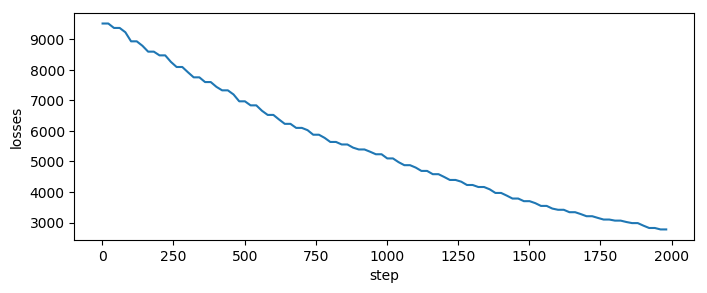

In [16]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np

#小批量算法
train_steps = 2000     # 训练次数
lr = 0.01              # 学习率
summary_step = 20      # 摘要频率
summary1 = []           # 摘要
tmp_grad_w = 0         #累加W
tmp_grad_b = 0         #累加b

W = np.random.randn(2) # 初始化连接权重
b = 0                  # 初始化偏置值
for i in range(train_steps):
    #摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X, W, b)
            tmp.append(np.array([label, out]))
            
        tmp = np.array(tmp)
        # 计算均方误差代价
        loss = mse(tmp[:,0], tmp[:, 1])
        summary1.append(np.array([i + 1, loss]))
    
    
        
    # 获得一个样本， 并输入模型得到模型输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)

    #计算偏导数并更新模型参数
    dW = -X * (label- out)
    db = -1 * (label - out)
        
    tmp_grad_w += dW
    tmp_grad_b += db
        
    #每32个样本为一组，再对W， b进行更新
    if i % 32 == 31:
        W = W - lr * tmp_grad_w / 32
        b = b - lr * tmp_grad_b / 32
           
        tmp_grad_w = 0         
        tmp_grad_b = 0  
            
# 可视化摘要
summary1 = np.array(summary1)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary1[:, 0], summary1[:, 1])
plt.xlabel('step')
plt.ylabel('losses')